# Deep learning with Keras: part 2

## Goal: Learn to train neural networks & experiment with example code

## A) Image superresolution with grayscale ellipses

#### First import all the necessary packages. If you get an error here, make sure have actually installed the package!

In [124]:
import cv2
import glob

import numpy as np
#from numpy.linalg import norm

import imageio.v2 as imageio

import scipy.io
from scipy.io import savemat

from tensorflow.keras import Model, layers, Input
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.layers.core import Dense
from tensorflow.keras.layers import Add, BatchNormalization, Convolution2D, UpSampling2D, Dense, MaxPooling2D, concatenate
#from tensorflow.keras.layers.convolutional import MaxPooling2D
import tensorflow.keras.backend as K 
#from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from skimage import transform

import skimage
from skimage.measure import block_reduce

import matplotlib.pyplot as plt

from random import randrange

%matplotlib inline 

#### Load the training data from directory (mat-files)

In [52]:
# Import training input
train_input = []
files       = sorted(glob.glob("ellipses_train/*.mat"))

for myFile in files:
    print(myFile)
    mat    = scipy.io.loadmat(myFile)
    matrix = mat['ph']
    train_input.append(matrix)  
train_input = np.array(train_input)

# Import training output (ground truth)
train_gt = []
files    = sorted(glob.glob("ellipses_train/*.mat"))

for myFile in files:
    print(myFile)
    mat    = scipy.io.loadmat(myFile)
    matrix = mat['ph']
    train_gt.append(matrix)  
train_gt = np.array(train_gt)

ellipses/ph0001.mat
ellipses/ph0002.mat
ellipses/ph0003.mat
ellipses/ph0004.mat
ellipses/ph0005.mat
ellipses/ph0006.mat
ellipses/ph0007.mat
ellipses/ph0008.mat
ellipses/ph0009.mat
ellipses/ph0010.mat
ellipses/ph0011.mat
ellipses/ph0012.mat
ellipses/ph0013.mat
ellipses/ph0014.mat
ellipses/ph0015.mat
ellipses/ph0016.mat
ellipses/ph0017.mat
ellipses/ph0018.mat
ellipses/ph0019.mat
ellipses/ph0020.mat
ellipses/ph0021.mat
ellipses/ph0022.mat
ellipses/ph0023.mat
ellipses/ph0024.mat
ellipses/ph0025.mat
ellipses/ph0026.mat
ellipses/ph0027.mat
ellipses/ph0028.mat
ellipses/ph0029.mat
ellipses/ph0030.mat
ellipses/ph0031.mat
ellipses/ph0032.mat
ellipses/ph0033.mat
ellipses/ph0034.mat
ellipses/ph0035.mat
ellipses/ph0036.mat
ellipses/ph0037.mat
ellipses/ph0038.mat
ellipses/ph0039.mat
ellipses/ph0040.mat
ellipses/ph0041.mat
ellipses/ph0042.mat
ellipses/ph0043.mat
ellipses/ph0044.mat
ellipses/ph0045.mat
ellipses/ph0046.mat
ellipses/ph0047.mat
ellipses/ph0048.mat
ellipses/ph0049.mat
ellipses/ph0050.mat


ellipses/ph0613.mat
ellipses/ph0614.mat
ellipses/ph0615.mat
ellipses/ph0616.mat
ellipses/ph0617.mat
ellipses/ph0618.mat
ellipses/ph0619.mat
ellipses/ph0620.mat
ellipses/ph0621.mat
ellipses/ph0622.mat
ellipses/ph0623.mat
ellipses/ph0624.mat
ellipses/ph0625.mat
ellipses/ph0626.mat
ellipses/ph0627.mat
ellipses/ph0628.mat
ellipses/ph0629.mat
ellipses/ph0630.mat
ellipses/ph0631.mat
ellipses/ph0632.mat
ellipses/ph0633.mat
ellipses/ph0634.mat
ellipses/ph0635.mat
ellipses/ph0636.mat
ellipses/ph0637.mat
ellipses/ph0638.mat
ellipses/ph0639.mat
ellipses/ph0640.mat
ellipses/ph0641.mat
ellipses/ph0642.mat
ellipses/ph0643.mat
ellipses/ph0644.mat
ellipses/ph0645.mat
ellipses/ph0646.mat
ellipses/ph0647.mat
ellipses/ph0648.mat
ellipses/ph0649.mat
ellipses/ph0650.mat
ellipses/ph0651.mat
ellipses/ph0652.mat
ellipses/ph0653.mat
ellipses/ph0654.mat
ellipses/ph0655.mat
ellipses/ph0656.mat
ellipses/ph0657.mat
ellipses/ph0658.mat
ellipses/ph0659.mat
ellipses/ph0660.mat
ellipses/ph0661.mat
ellipses/ph0662.mat


ellipses/ph1214.mat
ellipses/ph1215.mat
ellipses/ph1216.mat
ellipses/ph1217.mat
ellipses/ph1218.mat
ellipses/ph1219.mat
ellipses/ph1220.mat
ellipses/ph1221.mat
ellipses/ph1222.mat
ellipses/ph1223.mat
ellipses/ph1224.mat
ellipses/ph1225.mat
ellipses/ph1226.mat
ellipses/ph1227.mat
ellipses/ph1228.mat
ellipses/ph1229.mat
ellipses/ph1230.mat
ellipses/ph1231.mat
ellipses/ph1232.mat
ellipses/ph1233.mat
ellipses/ph1234.mat
ellipses/ph1235.mat
ellipses/ph1236.mat
ellipses/ph1237.mat
ellipses/ph1238.mat
ellipses/ph1239.mat
ellipses/ph1240.mat
ellipses/ph1241.mat
ellipses/ph1242.mat
ellipses/ph1243.mat
ellipses/ph1244.mat
ellipses/ph1245.mat
ellipses/ph1246.mat
ellipses/ph1247.mat
ellipses/ph1248.mat
ellipses/ph1249.mat
ellipses/ph1250.mat
ellipses/ph1251.mat
ellipses/ph1252.mat
ellipses/ph1253.mat
ellipses/ph1254.mat
ellipses/ph1255.mat
ellipses/ph1256.mat
ellipses/ph1257.mat
ellipses/ph1258.mat
ellipses/ph1259.mat
ellipses/ph1260.mat
ellipses/ph1261.mat
ellipses/ph1262.mat
ellipses/ph1263.mat


ellipses/ph1839.mat
ellipses/ph1840.mat
ellipses/ph1841.mat
ellipses/ph1842.mat
ellipses/ph1843.mat
ellipses/ph1844.mat
ellipses/ph1845.mat
ellipses/ph1846.mat
ellipses/ph1847.mat
ellipses/ph1848.mat
ellipses/ph1849.mat
ellipses/ph1850.mat
ellipses/ph1851.mat
ellipses/ph1852.mat
ellipses/ph1853.mat
ellipses/ph1854.mat
ellipses/ph1855.mat
ellipses/ph1856.mat
ellipses/ph1857.mat
ellipses/ph1858.mat
ellipses/ph1859.mat
ellipses/ph1860.mat
ellipses/ph1861.mat
ellipses/ph1862.mat
ellipses/ph1863.mat
ellipses/ph1864.mat
ellipses/ph1865.mat
ellipses/ph1866.mat
ellipses/ph1867.mat
ellipses/ph1868.mat
ellipses/ph1869.mat
ellipses/ph1870.mat
ellipses/ph1871.mat
ellipses/ph1872.mat
ellipses/ph1873.mat
ellipses/ph1874.mat
ellipses/ph1875.mat
ellipses/ph1876.mat
ellipses/ph1877.mat
ellipses/ph1878.mat
ellipses/ph1879.mat
ellipses/ph1880.mat
ellipses/ph1881.mat
ellipses/ph1882.mat
ellipses/ph1883.mat
ellipses/ph1884.mat
ellipses/ph1885.mat
ellipses/ph1886.mat
ellipses/ph1887.mat
ellipses/ph1888.mat


ellipses/ph2448.mat
ellipses/ph2449.mat
ellipses/ph2450.mat
ellipses/ph2451.mat
ellipses/ph2452.mat
ellipses/ph2453.mat
ellipses/ph2454.mat
ellipses/ph2455.mat
ellipses/ph2456.mat
ellipses/ph2457.mat
ellipses/ph2458.mat
ellipses/ph2459.mat
ellipses/ph2460.mat
ellipses/ph2461.mat
ellipses/ph2462.mat
ellipses/ph2463.mat
ellipses/ph2464.mat
ellipses/ph2465.mat
ellipses/ph2466.mat
ellipses/ph2467.mat
ellipses/ph2468.mat
ellipses/ph2469.mat
ellipses/ph2470.mat
ellipses/ph2471.mat
ellipses/ph2472.mat
ellipses/ph2473.mat
ellipses/ph2474.mat
ellipses/ph2475.mat
ellipses/ph2476.mat
ellipses/ph2477.mat
ellipses/ph2478.mat
ellipses/ph2479.mat
ellipses/ph2480.mat
ellipses/ph2481.mat
ellipses/ph2482.mat
ellipses/ph2483.mat
ellipses/ph2484.mat
ellipses/ph2485.mat
ellipses/ph2486.mat
ellipses/ph2487.mat
ellipses/ph2488.mat
ellipses/ph2489.mat
ellipses/ph2490.mat
ellipses/ph2491.mat
ellipses/ph2492.mat
ellipses/ph2493.mat
ellipses/ph2494.mat
ellipses/ph2495.mat
ellipses/ph2496.mat
ellipses/ph2497.mat


ellipses/ph3085.mat
ellipses/ph3086.mat
ellipses/ph3087.mat
ellipses/ph3088.mat
ellipses/ph3089.mat
ellipses/ph3090.mat
ellipses/ph3091.mat
ellipses/ph3092.mat
ellipses/ph3093.mat
ellipses/ph3094.mat
ellipses/ph3095.mat
ellipses/ph3096.mat
ellipses/ph3097.mat
ellipses/ph3098.mat
ellipses/ph3099.mat
ellipses/ph3100.mat
ellipses/ph3101.mat
ellipses/ph3102.mat
ellipses/ph3103.mat
ellipses/ph3104.mat
ellipses/ph3105.mat
ellipses/ph3106.mat
ellipses/ph3107.mat
ellipses/ph3108.mat
ellipses/ph3109.mat
ellipses/ph3110.mat
ellipses/ph3111.mat
ellipses/ph3112.mat
ellipses/ph3113.mat
ellipses/ph3114.mat
ellipses/ph3115.mat
ellipses/ph3116.mat
ellipses/ph3117.mat
ellipses/ph3118.mat
ellipses/ph3119.mat
ellipses/ph3120.mat
ellipses/ph3121.mat
ellipses/ph3122.mat
ellipses/ph3123.mat
ellipses/ph3124.mat
ellipses/ph3125.mat
ellipses/ph3126.mat
ellipses/ph3127.mat
ellipses/ph3128.mat
ellipses/ph3129.mat
ellipses/ph3130.mat
ellipses/ph3131.mat
ellipses/ph3132.mat
ellipses/ph3133.mat
ellipses/ph3134.mat


ellipses/ph3718.mat
ellipses/ph3719.mat
ellipses/ph3720.mat
ellipses/ph3721.mat
ellipses/ph3722.mat
ellipses/ph3723.mat
ellipses/ph3724.mat
ellipses/ph3725.mat
ellipses/ph3726.mat
ellipses/ph3727.mat
ellipses/ph3728.mat
ellipses/ph3729.mat
ellipses/ph3730.mat
ellipses/ph3731.mat
ellipses/ph3732.mat
ellipses/ph3733.mat
ellipses/ph3734.mat
ellipses/ph3735.mat
ellipses/ph3736.mat
ellipses/ph3737.mat
ellipses/ph3738.mat
ellipses/ph3739.mat
ellipses/ph3740.mat
ellipses/ph3741.mat
ellipses/ph3742.mat
ellipses/ph3743.mat
ellipses/ph3744.mat
ellipses/ph3745.mat
ellipses/ph3746.mat
ellipses/ph3747.mat
ellipses/ph3748.mat
ellipses/ph3749.mat
ellipses/ph3750.mat
ellipses/ph3751.mat
ellipses/ph3752.mat
ellipses/ph3753.mat
ellipses/ph3754.mat
ellipses/ph3755.mat
ellipses/ph3756.mat
ellipses/ph3757.mat
ellipses/ph3758.mat
ellipses/ph3759.mat
ellipses/ph3760.mat
ellipses/ph3761.mat
ellipses/ph3762.mat
ellipses/ph3763.mat
ellipses/ph3764.mat
ellipses/ph3765.mat
ellipses/ph3766.mat
ellipses/ph3767.mat


ellipses/ph4282.mat
ellipses/ph4283.mat
ellipses/ph4284.mat
ellipses/ph4285.mat
ellipses/ph4286.mat
ellipses/ph4287.mat
ellipses/ph4288.mat
ellipses/ph4289.mat
ellipses/ph4290.mat
ellipses/ph4291.mat
ellipses/ph4292.mat
ellipses/ph4293.mat
ellipses/ph4294.mat
ellipses/ph4295.mat
ellipses/ph4296.mat
ellipses/ph4297.mat
ellipses/ph4298.mat
ellipses/ph4299.mat
ellipses/ph4300.mat
ellipses/ph4301.mat
ellipses/ph4302.mat
ellipses/ph4303.mat
ellipses/ph4304.mat
ellipses/ph4305.mat
ellipses/ph4306.mat
ellipses/ph4307.mat
ellipses/ph4308.mat
ellipses/ph4309.mat
ellipses/ph4310.mat
ellipses/ph4311.mat
ellipses/ph4312.mat
ellipses/ph4313.mat
ellipses/ph4314.mat
ellipses/ph4315.mat
ellipses/ph4316.mat
ellipses/ph4317.mat
ellipses/ph4318.mat
ellipses/ph4319.mat
ellipses/ph4320.mat
ellipses/ph4321.mat
ellipses/ph4322.mat
ellipses/ph4323.mat
ellipses/ph4324.mat
ellipses/ph4325.mat
ellipses/ph4326.mat
ellipses/ph4327.mat
ellipses/ph4328.mat
ellipses/ph4329.mat
ellipses/ph4330.mat
ellipses/ph4331.mat


ellipses/ph4849.mat
ellipses/ph4850.mat
ellipses/ph4851.mat
ellipses/ph4852.mat
ellipses/ph4853.mat
ellipses/ph4854.mat
ellipses/ph4855.mat
ellipses/ph4856.mat
ellipses/ph4857.mat
ellipses/ph4858.mat
ellipses/ph4859.mat
ellipses/ph4860.mat
ellipses/ph4861.mat
ellipses/ph4862.mat
ellipses/ph4863.mat
ellipses/ph4864.mat
ellipses/ph4865.mat
ellipses/ph4866.mat
ellipses/ph4867.mat
ellipses/ph4868.mat
ellipses/ph4869.mat
ellipses/ph4870.mat
ellipses/ph4871.mat
ellipses/ph4872.mat
ellipses/ph4873.mat
ellipses/ph4874.mat
ellipses/ph4875.mat
ellipses/ph4876.mat
ellipses/ph4877.mat
ellipses/ph4878.mat
ellipses/ph4879.mat
ellipses/ph4880.mat
ellipses/ph4881.mat
ellipses/ph4882.mat
ellipses/ph4883.mat
ellipses/ph4884.mat
ellipses/ph4885.mat
ellipses/ph4886.mat
ellipses/ph4887.mat
ellipses/ph4888.mat
ellipses/ph4889.mat
ellipses/ph4890.mat
ellipses/ph4891.mat
ellipses/ph4892.mat
ellipses/ph4893.mat
ellipses/ph4894.mat
ellipses/ph4895.mat
ellipses/ph4896.mat
ellipses/ph4897.mat
ellipses/ph4898.mat


ellipses/ph0295.mat
ellipses/ph0296.mat
ellipses/ph0297.mat
ellipses/ph0298.mat
ellipses/ph0299.mat
ellipses/ph0300.mat
ellipses/ph0301.mat
ellipses/ph0302.mat
ellipses/ph0303.mat
ellipses/ph0304.mat
ellipses/ph0305.mat
ellipses/ph0306.mat
ellipses/ph0307.mat
ellipses/ph0308.mat
ellipses/ph0309.mat
ellipses/ph0310.mat
ellipses/ph0311.mat
ellipses/ph0312.mat
ellipses/ph0313.mat
ellipses/ph0314.mat
ellipses/ph0315.mat
ellipses/ph0316.mat
ellipses/ph0317.mat
ellipses/ph0318.mat
ellipses/ph0319.mat
ellipses/ph0320.mat
ellipses/ph0321.mat
ellipses/ph0322.mat
ellipses/ph0323.mat
ellipses/ph0324.mat
ellipses/ph0325.mat
ellipses/ph0326.mat
ellipses/ph0327.mat
ellipses/ph0328.mat
ellipses/ph0329.mat
ellipses/ph0330.mat
ellipses/ph0331.mat
ellipses/ph0332.mat
ellipses/ph0333.mat
ellipses/ph0334.mat
ellipses/ph0335.mat
ellipses/ph0336.mat
ellipses/ph0337.mat
ellipses/ph0338.mat
ellipses/ph0339.mat
ellipses/ph0340.mat
ellipses/ph0341.mat
ellipses/ph0342.mat
ellipses/ph0343.mat
ellipses/ph0344.mat


ellipses/ph0952.mat
ellipses/ph0953.mat
ellipses/ph0954.mat
ellipses/ph0955.mat
ellipses/ph0956.mat
ellipses/ph0957.mat
ellipses/ph0958.mat
ellipses/ph0959.mat
ellipses/ph0960.mat
ellipses/ph0961.mat
ellipses/ph0962.mat
ellipses/ph0963.mat
ellipses/ph0964.mat
ellipses/ph0965.mat
ellipses/ph0966.mat
ellipses/ph0967.mat
ellipses/ph0968.mat
ellipses/ph0969.mat
ellipses/ph0970.mat
ellipses/ph0971.mat
ellipses/ph0972.mat
ellipses/ph0973.mat
ellipses/ph0974.mat
ellipses/ph0975.mat
ellipses/ph0976.mat
ellipses/ph0977.mat
ellipses/ph0978.mat
ellipses/ph0979.mat
ellipses/ph0980.mat
ellipses/ph0981.mat
ellipses/ph0982.mat
ellipses/ph0983.mat
ellipses/ph0984.mat
ellipses/ph0985.mat
ellipses/ph0986.mat
ellipses/ph0987.mat
ellipses/ph0988.mat
ellipses/ph0989.mat
ellipses/ph0990.mat
ellipses/ph0991.mat
ellipses/ph0992.mat
ellipses/ph0993.mat
ellipses/ph0994.mat
ellipses/ph0995.mat
ellipses/ph0996.mat
ellipses/ph0997.mat
ellipses/ph0998.mat
ellipses/ph0999.mat
ellipses/ph1000.mat
ellipses/ph1001.mat


ellipses/ph1604.mat
ellipses/ph1605.mat
ellipses/ph1606.mat
ellipses/ph1607.mat
ellipses/ph1608.mat
ellipses/ph1609.mat
ellipses/ph1610.mat
ellipses/ph1611.mat
ellipses/ph1612.mat
ellipses/ph1613.mat
ellipses/ph1614.mat
ellipses/ph1615.mat
ellipses/ph1616.mat
ellipses/ph1617.mat
ellipses/ph1618.mat
ellipses/ph1619.mat
ellipses/ph1620.mat
ellipses/ph1621.mat
ellipses/ph1622.mat
ellipses/ph1623.mat
ellipses/ph1624.mat
ellipses/ph1625.mat
ellipses/ph1626.mat
ellipses/ph1627.mat
ellipses/ph1628.mat
ellipses/ph1629.mat
ellipses/ph1630.mat
ellipses/ph1631.mat
ellipses/ph1632.mat
ellipses/ph1633.mat
ellipses/ph1634.mat
ellipses/ph1635.mat
ellipses/ph1636.mat
ellipses/ph1637.mat
ellipses/ph1638.mat
ellipses/ph1639.mat
ellipses/ph1640.mat
ellipses/ph1641.mat
ellipses/ph1642.mat
ellipses/ph1643.mat
ellipses/ph1644.mat
ellipses/ph1645.mat
ellipses/ph1646.mat
ellipses/ph1647.mat
ellipses/ph1648.mat
ellipses/ph1649.mat
ellipses/ph1650.mat
ellipses/ph1651.mat
ellipses/ph1652.mat
ellipses/ph1653.mat


ellipses/ph2260.mat
ellipses/ph2261.mat
ellipses/ph2262.mat
ellipses/ph2263.mat
ellipses/ph2264.mat
ellipses/ph2265.mat
ellipses/ph2266.mat
ellipses/ph2267.mat
ellipses/ph2268.mat
ellipses/ph2269.mat
ellipses/ph2270.mat
ellipses/ph2271.mat
ellipses/ph2272.mat
ellipses/ph2273.mat
ellipses/ph2274.mat
ellipses/ph2275.mat
ellipses/ph2276.mat
ellipses/ph2277.mat
ellipses/ph2278.mat
ellipses/ph2279.mat
ellipses/ph2280.mat
ellipses/ph2281.mat
ellipses/ph2282.mat
ellipses/ph2283.mat
ellipses/ph2284.mat
ellipses/ph2285.mat
ellipses/ph2286.mat
ellipses/ph2287.mat
ellipses/ph2288.mat
ellipses/ph2289.mat
ellipses/ph2290.mat
ellipses/ph2291.mat
ellipses/ph2292.mat
ellipses/ph2293.mat
ellipses/ph2294.mat
ellipses/ph2295.mat
ellipses/ph2296.mat
ellipses/ph2297.mat
ellipses/ph2298.mat
ellipses/ph2299.mat
ellipses/ph2300.mat
ellipses/ph2301.mat
ellipses/ph2302.mat
ellipses/ph2303.mat
ellipses/ph2304.mat
ellipses/ph2305.mat
ellipses/ph2306.mat
ellipses/ph2307.mat
ellipses/ph2308.mat
ellipses/ph2309.mat


ellipses/ph2917.mat
ellipses/ph2918.mat
ellipses/ph2919.mat
ellipses/ph2920.mat
ellipses/ph2921.mat
ellipses/ph2922.mat
ellipses/ph2923.mat
ellipses/ph2924.mat
ellipses/ph2925.mat
ellipses/ph2926.mat
ellipses/ph2927.mat
ellipses/ph2928.mat
ellipses/ph2929.mat
ellipses/ph2930.mat
ellipses/ph2931.mat
ellipses/ph2932.mat
ellipses/ph2933.mat
ellipses/ph2934.mat
ellipses/ph2935.mat
ellipses/ph2936.mat
ellipses/ph2937.mat
ellipses/ph2938.mat
ellipses/ph2939.mat
ellipses/ph2940.mat
ellipses/ph2941.mat
ellipses/ph2942.mat
ellipses/ph2943.mat
ellipses/ph2944.mat
ellipses/ph2945.mat
ellipses/ph2946.mat
ellipses/ph2947.mat
ellipses/ph2948.mat
ellipses/ph2949.mat
ellipses/ph2950.mat
ellipses/ph2951.mat
ellipses/ph2952.mat
ellipses/ph2953.mat
ellipses/ph2954.mat
ellipses/ph2955.mat
ellipses/ph2956.mat
ellipses/ph2957.mat
ellipses/ph2958.mat
ellipses/ph2959.mat
ellipses/ph2960.mat
ellipses/ph2961.mat
ellipses/ph2962.mat
ellipses/ph2963.mat
ellipses/ph2964.mat
ellipses/ph2965.mat
ellipses/ph2966.mat


ellipses/ph3571.mat
ellipses/ph3572.mat
ellipses/ph3573.mat
ellipses/ph3574.mat
ellipses/ph3575.mat
ellipses/ph3576.mat
ellipses/ph3577.mat
ellipses/ph3578.mat
ellipses/ph3579.mat
ellipses/ph3580.mat
ellipses/ph3581.mat
ellipses/ph3582.mat
ellipses/ph3583.mat
ellipses/ph3584.mat
ellipses/ph3585.mat
ellipses/ph3586.mat
ellipses/ph3587.mat
ellipses/ph3588.mat
ellipses/ph3589.mat
ellipses/ph3590.mat
ellipses/ph3591.mat
ellipses/ph3592.mat
ellipses/ph3593.mat
ellipses/ph3594.mat
ellipses/ph3595.mat
ellipses/ph3596.mat
ellipses/ph3597.mat
ellipses/ph3598.mat
ellipses/ph3599.mat
ellipses/ph3600.mat
ellipses/ph3601.mat
ellipses/ph3602.mat
ellipses/ph3603.mat
ellipses/ph3604.mat
ellipses/ph3605.mat
ellipses/ph3606.mat
ellipses/ph3607.mat
ellipses/ph3608.mat
ellipses/ph3609.mat
ellipses/ph3610.mat
ellipses/ph3611.mat
ellipses/ph3612.mat
ellipses/ph3613.mat
ellipses/ph3614.mat
ellipses/ph3615.mat
ellipses/ph3616.mat
ellipses/ph3617.mat
ellipses/ph3618.mat
ellipses/ph3619.mat
ellipses/ph3620.mat


ellipses/ph4148.mat
ellipses/ph4149.mat
ellipses/ph4150.mat
ellipses/ph4151.mat
ellipses/ph4152.mat
ellipses/ph4153.mat
ellipses/ph4154.mat
ellipses/ph4155.mat
ellipses/ph4156.mat
ellipses/ph4157.mat
ellipses/ph4158.mat
ellipses/ph4159.mat
ellipses/ph4160.mat
ellipses/ph4161.mat
ellipses/ph4162.mat
ellipses/ph4163.mat
ellipses/ph4164.mat
ellipses/ph4165.mat
ellipses/ph4166.mat
ellipses/ph4167.mat
ellipses/ph4168.mat
ellipses/ph4169.mat
ellipses/ph4170.mat
ellipses/ph4171.mat
ellipses/ph4172.mat
ellipses/ph4173.mat
ellipses/ph4174.mat
ellipses/ph4175.mat
ellipses/ph4176.mat
ellipses/ph4177.mat
ellipses/ph4178.mat
ellipses/ph4179.mat
ellipses/ph4180.mat
ellipses/ph4181.mat
ellipses/ph4182.mat
ellipses/ph4183.mat
ellipses/ph4184.mat
ellipses/ph4185.mat
ellipses/ph4186.mat
ellipses/ph4187.mat
ellipses/ph4188.mat
ellipses/ph4189.mat
ellipses/ph4190.mat
ellipses/ph4191.mat
ellipses/ph4192.mat
ellipses/ph4193.mat
ellipses/ph4194.mat
ellipses/ph4195.mat
ellipses/ph4196.mat
ellipses/ph4197.mat


ellipses/ph4711.mat
ellipses/ph4712.mat
ellipses/ph4713.mat
ellipses/ph4714.mat
ellipses/ph4715.mat
ellipses/ph4716.mat
ellipses/ph4717.mat
ellipses/ph4718.mat
ellipses/ph4719.mat
ellipses/ph4720.mat
ellipses/ph4721.mat
ellipses/ph4722.mat
ellipses/ph4723.mat
ellipses/ph4724.mat
ellipses/ph4725.mat
ellipses/ph4726.mat
ellipses/ph4727.mat
ellipses/ph4728.mat
ellipses/ph4729.mat
ellipses/ph4730.mat
ellipses/ph4731.mat
ellipses/ph4732.mat
ellipses/ph4733.mat
ellipses/ph4734.mat
ellipses/ph4735.mat
ellipses/ph4736.mat
ellipses/ph4737.mat
ellipses/ph4738.mat
ellipses/ph4739.mat
ellipses/ph4740.mat
ellipses/ph4741.mat
ellipses/ph4742.mat
ellipses/ph4743.mat
ellipses/ph4744.mat
ellipses/ph4745.mat
ellipses/ph4746.mat
ellipses/ph4747.mat
ellipses/ph4748.mat
ellipses/ph4749.mat
ellipses/ph4750.mat
ellipses/ph4751.mat
ellipses/ph4752.mat
ellipses/ph4753.mat
ellipses/ph4754.mat
ellipses/ph4755.mat
ellipses/ph4756.mat
ellipses/ph4757.mat
ellipses/ph4758.mat
ellipses/ph4759.mat
ellipses/ph4760.mat


In [53]:
# Show training set sizes

print(train_input.shape) 
print(train_gt.shape)

(5000, 128, 128)
(5000, 128, 128)


#### Pre-process training data

In [54]:
# Downsample data

train_input_cr = block_reduce(train_input, block_size=(1,4,4), func=np.mean)

print(train_gt.shape)
print(train_input_cr.shape)

train_input = train_input_cr

(5000, 128, 128)
(5000, 32, 32)


In [55]:
# Normalize data

print('Input value range:')
min_input = np.amin(train_input)
max_input = np.amax(train_input)
print(min_input)
print(max_input)
train_input = (train_input - min_input) / (max_input - min_input)

print('Output value range:')
min_output = np.amin(train_gt)
max_output = np.amax(train_gt)
print(min_output)
print(max_output)
train_gt = (train_gt - min_output) / (max_output - min_output)

print('Normalized input value range:')
print(np.amin(train_gt))
print(np.amax(train_gt))

print('Normalized output value range:')
print(np.amin(train_input))
print(np.amax(train_input))

omega value range:
0.0
0.9998998909850995
omega1 value range:
0.0
0.9998998909850995
Normalized omega1 value range:
0.0
1.0
Normalized omega value range:
0.0
1.0


1233
Example of input
0.0
0.9248147400307006


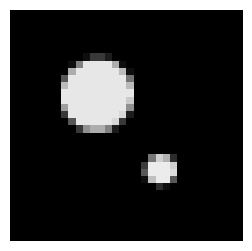

Example of output
0.0
0.9248147400307006


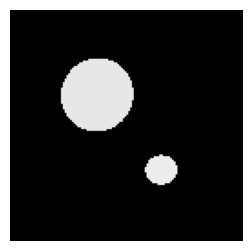

In [57]:
# Sanity check: take a look at training data
from random import randrange
plt.rcParams["figure.figsize"] = (3,3)

iii = randrange(5000)
print(iii)

print('Example of input')
im = train_input[iii,:,:]
print(np.amin(im))
print(np.amax(im))
plt.imshow(train_input[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

print('Example of output')
im3 = train_gt[iii,:,:]
print(np.amin(im3))
print(np.amax(im3))
plt.imshow(train_gt[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

In [58]:
# Create a validation set for training

valid_size = 1000  
train_gt, valid_gt       = train_test_split(train_gt, test_size=valid_size, shuffle=False)  
train_input, valid_input = train_test_split(train_input, test_size=valid_size, shuffle=False)  

print(np.amin(train_gt))
print(np.amax(train_gt))

print(np.amin(train_input))
print(np.amax(train_input))

0.0
0.9999746480583853
0.0
0.9999746480583853


698
Example of input
0.0
0.0


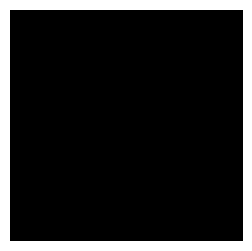

Example of output
0.0
0.0


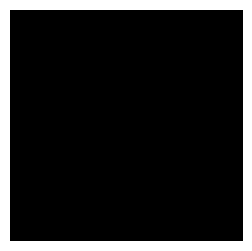

In [59]:
# Sanity check: take a look at validation data
from random import randrange
plt.rcParams["figure.figsize"] = (3,3)

iii = randrange(valid_size)
print(iii)

print('Example of input')
im = valid_input[iii,:,:]
print(np.amin(im))
print(np.amax(im))
plt.imshow(valid_input[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

print('Example of output')
im3 = valid_gt[iii,:,:]
print(np.amin(im3))
print(np.amax(im3))
plt.imshow(valid_gt[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

In [60]:
# Let's reshape the image data to the format the neural network expects for training

N = 128 # gt dimensions
M = 32  # input dimensions
X = 1   # color channels

train_gt    = train_gt.reshape(-1,N,N,X)
train_input = train_input.reshape(-1,M,M,X)

valid_gt    = valid_gt.reshape(-1,N,N,X)
valid_input = valid_input.reshape(-1,M,M,X)

print(train_gt.shape)
print(train_input.shape)

(4000, 128, 128, 1)
(4000, 32, 32, 1)


#### Neural network architecture: fully connected

In [144]:
def make_basic_network():  
    inputs = Input(shape=(M,M,X))
    
    x = Dense(10, activation='relu')(inputs)
    x = BatchNormalization()(x)
    
    x = Dense(20, activation='relu')(x)
    x = BatchNormalization()(x)
    
    x = Dense(30, activation='relu')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D()(x)
    
    x = Dense(40, activation='relu')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D()(x)
    
    x = Dense(1, activation='sigmoid')(x)
    #x = Dense(1, activation='sigmoid')(x)

    funcmodel = Model(inputs, x)
    
    
    #funcmodel.compile(optimizer='rmsprop', loss=euclidean_distance_loss, metrics=[dice_coef])
    
    funcmodel.compile(optimizer='adadelta', loss='MSE')
    
    return funcmodel

#### Neural network architecture: CNN

In [61]:
def make_CNN():
    inputs = Input(shape=(M,M,X))
    
    u1 = Convolution2D(128, 3, activation='relu', padding='same')(inputs)
    u1 = BatchNormalization()(u1)
    u2 = UpSampling2D()(u1)
    
    u3 = Convolution2D(64, 3, activation='relu', padding='same')(u2)
    u3 = BatchNormalization()(u3)
    u4 = UpSampling2D()(u3)
    
    decoded = Convolution2D(X, 1, activation='sigmoid', padding='same')(u4)
    
    neural_network = Model(inputs, decoded)
    neural_network.compile(optimizer='adam', loss='MSE')
    
    return neural_network

#### Neural network architecture: Unet

In [21]:
def make_convolutional_autoencoder():
    # encoding
    inputs = Input(shape=(M,M,X))
    
    d1 = Convolution2D(64, 3, activation='relu', padding='same')(inputs)
    d1 = BatchNormalization()(d1)
    d2 = MaxPooling2D(padding='same')(d1)
    
    d3 = Convolution2D(128, 3, activation='relu', padding='same')(d2)
    d3 = BatchNormalization()(d3)
    encoded = MaxPooling2D(padding='same')(d3)    
    
    # decoding
    u1 = Convolution2D(128, 3, activation='relu', padding='same')(encoded)
    u1 = BatchNormalization()(u1)
    u2 = UpSampling2D()(u1)
    u2 = concatenate([u2, d3])
    
    u3 = Convolution2D(64, 3, activation='relu', padding='same')(u2)
    u3 = BatchNormalization()(u3)
    u4 = UpSampling2D()(u3)
    u4 = concatenate([u4, d1])
    
    u5 = Convolution2D(32, 3, activation='relu', padding='same')(u4)
    u5 = BatchNormalization()(u5)
    u6 = UpSampling2D()(u5)
    
    u7 = Convolution2D(32, 3, activation='relu', padding='same')(u6)
    u7 = BatchNormalization()(u7)
    u8 = UpSampling2D()(u7)
    
    decoded = Convolution2D(X, 1, activation='sigmoid', padding='same')(u8)
    
    # autoencoder
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='MSE')
    
    return autoencoder

In [145]:
# Create model

neural_network = make_basic_network()
#neural_network = make_CNN()
#neural_network = make_convolutional_autoencoder()

neural_network.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 dense_20 (Dense)            (None, 32, 32, 10)        20        
                                                                 
 batch_normalization_44 (Bat  (None, 32, 32, 10)       40        
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 32, 32, 20)        220       
                                                                 
 batch_normalization_45 (Bat  (None, 32, 32, 20)       80        
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 32, 32, 30)        630

#### Train neural network

In [149]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=6) #early stopping

# train
history = neural_network.fit(train_input, train_gt, epochs=5, batch_size=5, validation_data=(valid_input, valid_gt), callbacks=[es])

Epoch 1/5
800/800 [==============================] - 61s 76ms/step - loss: 0.1499 - val_loss: 0.2552
Epoch 2/5
800/800 [==============================] - 56s 70ms/step - loss: 0.1330 - val_loss: 0.1699
Epoch 3/5
800/800 [==============================] - 62s 78ms/step - loss: 0.1170 - val_loss: 0.1027
Epoch 4/5
800/800 [==============================] - 59s 74ms/step - loss: 0.1028 - val_loss: 0.0272
Epoch 5/5
800/800 [==============================] - 52s 65ms/step - loss: 0.0897 - val_loss: 0.0178


In [24]:
# Save model
neural_network.save('models/ellipse_superresolution_basicNN')

INFO:tensorflow:Assets written to: models/ellipse_superresolution_test1/assets


INFO:tensorflow:Assets written to: models/ellipse_superresolution_test1/assets


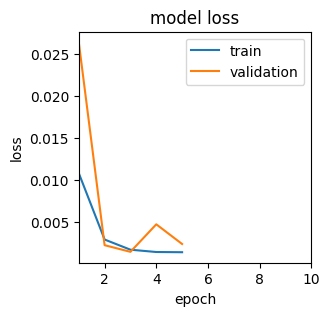

In [64]:
# summarize history for loss

loss_values = history.history['loss']
epochs      = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values)
plt.plot(epochs,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.xlim([1, 10])
plt.savefig('figures/loss_ellipse_superresolution_test1.png')
plt.show()

#### Test results with unseen data

In [ ]:
# Load model
autoencoder = models.load_model('models/ellipse_superresolution_test1')

In [108]:
# Import testing input
test_input = []
files      = sorted(glob.glob("ellipses_test/*.mat"))

for myFile in files:
    print(myFile)
    mat    = scipy.io.loadmat(myFile)
    matrix = mat['ph']
    test_input.append(matrix)  
test_input = np.array(test_input)

# Import training output (ground truth)
test_gt = []
files   = sorted(glob.glob("ellipses_test/*.mat"))

for myFile in files:
    print(myFile)
    mat    = scipy.io.loadmat(myFile)
    matrix = mat['ph']
    test_gt.append(matrix)  
test_gt = np.array(test_gt)

ellipses_test/ph0001.mat
ellipses_test/ph0002.mat
ellipses_test/ph0003.mat
ellipses_test/ph0004.mat
ellipses_test/ph0005.mat
ellipses_test/ph0006.mat
ellipses_test/ph0007.mat
ellipses_test/ph0008.mat
ellipses_test/ph0001.mat
ellipses_test/ph0002.mat
ellipses_test/ph0003.mat
ellipses_test/ph0004.mat
ellipses_test/ph0005.mat
ellipses_test/ph0006.mat
ellipses_test/ph0007.mat
ellipses_test/ph0008.mat


In [109]:
# Downsample data

test_input_cr = block_reduce(test_input, block_size=(1,4,4), func=np.mean)

print(test_gt.shape)
print(test_input_cr.shape)

test_input = test_input_cr

(8, 128, 128)
(8, 32, 32)


In [110]:
# Normalize data

print('Input value range:')
min_input = np.amin(test_input)
max_input = np.amax(test_input)
print(min_input)
print(max_input)
test_input = (test_input - min_input) / (max_input - min_input)

print('Output value range:')
min_output = np.amin(test_gt)
max_output = np.amax(test_gt)
print(min_output)
print(max_output)
test_gt = (test_gt - min_output) / (max_output - min_output)

print('Normalized input value range:')
print(np.amin(test_gt))
print(np.amax(test_gt))

print('Normalized output value range:')
print(np.amin(test_input))
print(np.amax(test_input))

print(test_gt.shape)
print(test_input.shape)

test_gt     = test_gt.reshape(-1,N,N,X)
test_input  = test_input.reshape(-1,M,M,X)

print(test_gt.shape)
print(test_input.shape)

Input value range:
-2.455727463752876e-06
1.0
Output value range:
-2.0284702261885085e-05
1.0
Normalized input value range:
0.0
0.9999746480583853
Normalized output value range:
0.0
0.9999746480583853
(8, 128, 128)
(8, 32, 32)
(8, 128, 128, 1)
(8, 32, 32, 1)


In [150]:
# Predict results on test set

test_gt_decoded = neural_network.predict(test_input)
print(test_gt_decoded.shape)

1/1 [==============================] - 0s 82ms/step
(8, 128, 128, 1)


3
Network input
2.4557214331703093e-06
1.0


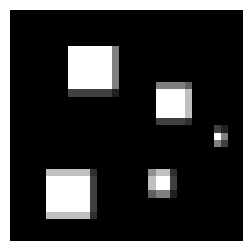

Network output
0.048209384
0.9999355


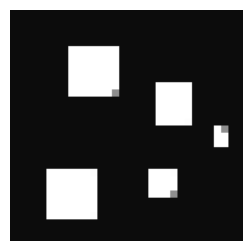

Ground truth
2.0284290801085592e-05
1.0


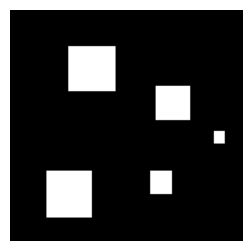

In [151]:
# We pass the testing inputs to the neural network to see the restored data

iii = 3
print(iii)

print('Network input')
im3 = test_input[iii,:,:]
print(np.amin(im3))
print(np.amax(im3))
plt.imshow(test_input[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

print('Network output')
im3 = test_gt_decoded[iii,:,:]
print(np.amin(im3))
print(np.amax(im3))
plt.imshow(test_gt_decoded[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

print('Ground truth')
im3 = test_gt[iii,:,:]
print(np.amin(im3))
print(np.amax(im3))
plt.imshow(test_gt[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

In [125]:
# Save whole test set as mat.-files

for iii in range(len(test_gt_decoded)):
    mydata   = test_gt_decoded[iii,:,:,:]
    filename = "results/ellipses_%04.f.mat" % iii
    savemat(filename, {'mydata': mydata})
    print(iii)

0
1
2
3
4
5
6
7


## To do: Experiment!
Try out different hyperparameters for the neural networks. What yields the best results? Things to experiment with:

- neural network type (compare number of learned parameters!)
- number of neurons in each layer (make sure dimensions match the data!)
- how many epochs necessary to reach convergence?
- loss functions (mean squared error, custom loss functions?) 
- activation functions (relu, sigmoid, tanh...)
- to use batch normalization or not?
- optimizer (adam, adadelta, rmsprop...)